In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#import sklearn

#import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
#from tigramite.lpcmci import LPCMCI

from tigramite.independence_tests.parcorr import ParCorr
#from tigramite.independence_tests.robust_parcorr import RobustParCorr
#from tigramite.independence_tests.parcorr_wls import ParCorrWLS 
#from tigramite.independence_tests.gpdc import GPDC
#from tigramite.independence_tests.cmiknn import CMIknn
#from tigramite.independence_tests.cmisymb import CMIsymb
#from tigramite.independence_tests.gsquared import Gsquared
#from tigramite.independence_tests.regressionCI import RegressionCI

In [13]:
df = pd.read_csv('../../../results/data/features~5/n~200/samples.csv')

var_names = df.columns
data = df.to_numpy()

In [16]:
dataframe = pp.DataFrame(data, datatime = {0:np.arange(len(data))}, var_names=var_names)

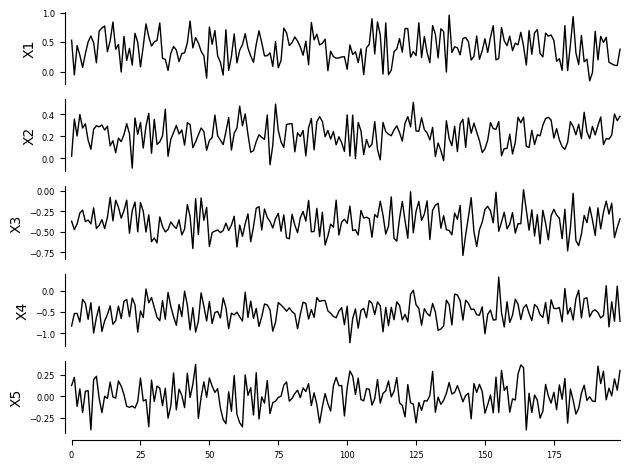

In [17]:
tp.plot_timeseries(dataframe)
plt.show()

In [18]:
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)


##
## Estimating lagged dependencies 
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 20


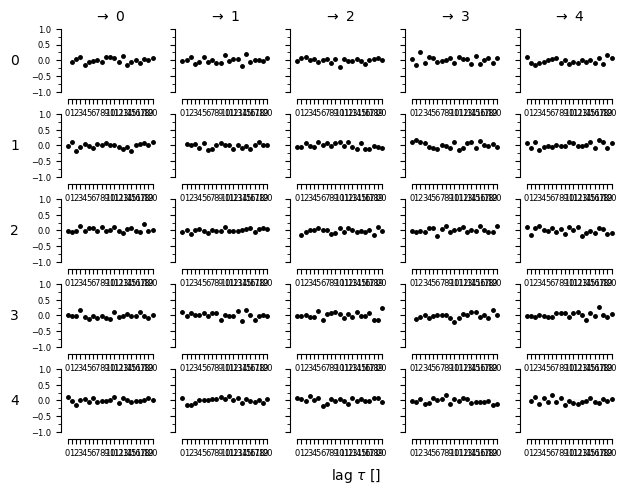

In [19]:
correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations)
plt.show()

In [35]:
results = pcmci.run_pcmci(tau_max=3, pc_alpha=None, alpha_level=0.05)


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 3
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable X1 has 3 link(s):
    [pc_alpha = 0.2]
        (X4 -3): max_pval = 0.10352, |min_val| =  0.117
        (X3 -3): max_pval = 0.12035, |min_val| =  0.112
        (X2 -2): max_pval = 0.17077, |min_val| =  0.099

    Variable X2 has 4 link(s):
    [pc_alpha = 0.2]
        (X1 -3): max_pval = 0.03812, |min_val| =  0.149
        (X5 -2): max_pval = 0.05410, |min_val| =  0.139
        (X5 -1): max_pval = 0.09928, |min_val| =  0.119
        (X1 -2): max_pval = 0.16684, |min_val| =  0.100

    Variable X3 has 1 link(s):
    [pc_alpha = 0.05]
        (X5 -3): max_pval = 0.04588, |min_val| =  0.144

    Variable X4 has 5 link(s):
    [pc_alpha = 0.3]
        (X1 -2): max_pval = 0.00977, |min_val| =  0.188
        (X1 -1): max_pval

In [36]:
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], tau_max=3, fdr_method='fdr_bh')

graph = pcmci.get_graph_from_pmatrix(p_matrix=q_matrix, alpha_level=0.05, 
            tau_min=0, tau_max=3, link_assumptions=None)

results['graph'] = graph

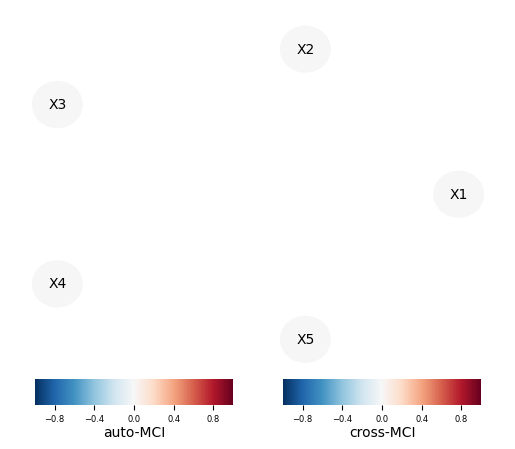

In [37]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    show_autodependency_lags=False
    ); plt.show()

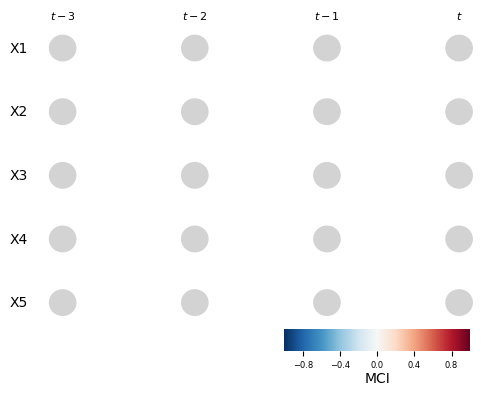

In [38]:
# Plot time series graph    
tp.plot_time_series_graph(
    figsize=(6, 4),
    val_matrix=results['val_matrix'],
    var_names=var_names,
    graph=results['graph'],
    link_colorbar_label='MCI',
    ); plt.show()

In [39]:
tp.write_csv(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    save_name='test_graph.csv',
    digits=5,
)

ValueError: graph needs to have consistent lag-zero links, but  graph[0,1,0]=--- and graph[1,0,0]=)

In [33]:
results['graph']

array([[['', '', '', '', ''],
        ['---', '', '', '', ''],
        ['', '', '', '', ''],
        ['', '', '', '', ''],
        ['', '', '', '', '']],

       [['', '', '', '', ''],
        ['', '', '', '', ''],
        ['', '', '', '', ''],
        ['', '', '', '', ''],
        ['', '', '', '', '']],

       [['', '', '', '', ''],
        ['', '', '', '', ''],
        ['', '', '', '', ''],
        ['', '', '', '', ''],
        ['', '', '', '', '']],

       [['', '', '', '', ''],
        ['', '', '', '', ''],
        ['', '', '', '', ''],
        ['', '', '', '', ''],
        ['', '', '', '', '']],

       [['', '', '', '', ''],
        ['', '', '', '', ''],
        ['', '', '', '', ''],
        ['', '', '', '', ''],
        ['', '', '', '', '']]], dtype='<U3')